In [1]:
import pandas as pd

price_map = {
    "Lowfat Milk": 0.49,
    "Whole Milk": 0.44,
    "Apple Pie": 0.63,
    "Apple Raw w/Skin": 0.53,
    "Bagels": 0.37,
    "Banana": 0.42,
    "Bean Bacon Soup": 1.58,
    "Bologna Turkey": 0.52,
    "Butter Regular": 0.33,
    "Cap'N Crunch": 0.47,
    "Carrots Raw": 0.33,
    "Celery Raw": 0.28,
    "Cheddar Cheese": 0.86,
    "Cheerios": 0.42,
    "Chicken Noodle Soup": 1.63,
    "Chocolate Chip Cookies": 0.47,
    "Corn Flakes Kellogg'S": 0.43,
    "Couscous": 0.63,
    "Crm Mshrm Soup": 1.53,
    "Frankfurter Beef": 0.88,
    "Frozen Broccoli": 0.91,
    "Frozen Corn": 0.47,
    "Grapes": 0.53,
    "Ham Sliced Extralean": 0.63,
    "Hamburger w/Toppings": 4.17,
    "Hotdog Plain": 2.07,
    "Kielbasa Pork": 0.52,
    "Kiwifruit Raw Fresh": 0.52,
    "Lettuce Iceberg Raw": 0.32,
    "Macaroni cooked": 0.64,
    "Malt-O-Meal Choc": 1.01,
    "New Eng Clam Chwd": 1.57,
    "New Eng Clam Chwd w/Mlk": 1.51,
    "Oatmeal": 1.03,
    "Oatmeal Cookies": 0.42,
    "Oranges": 0.42,
    "Peanut Butter": 0.47,
    "Peppers Sweet Raw": 0.71,
    "Pizza w/Pepperoni": 2.05,
    "Poached Eggs": 0.38,
    "Popcorn Air-Popped": 0.38,
    "Pork": 1.38,
    "Potato Chips": 0.64,
    "Potatoes Baked": 0.48,
    "Pretzels": 0.52,
    "Raisin Bran Kellogg'S": 0.59,
    "Rice Krispies": 0.48,
    "Roasted Chicken": 3.82,
    "Sardines in Oil": 1.15,
    "Scrambled Eggs": 0.37,
    "Skim Milk": 0.48,
    "Spaghetti W/ Sauce": 2.54,
    "Special K": 0.48,
    "Splt Pea&Ham Soup": 1.63,
    "Tofu": 0.92,
    "Tomato Red Ripe Raw": 0.37,
    "Tomato Soup": 1.27,
    "Tortilla Chips": 0.63,
    "Veggie Beef Soup": 1.56,
    "Wheat Bread": 0.38,
    "White Bread": 0.33,
    "White Rice": 0.57,
    "White Tuna in Water": 1.77,
}

# === actualizar archivo ===
df = pd.read_csv("diet_with_prices.csv")

# eliminamos precios anteriores si existen
if "Price" in df.columns:
    df.drop(columns=["Price"], inplace=True)

# asignamos nuevos precios según diccionario
df["Price"] = df["Name"].map(price_map)

# guardar
df.to_csv("diet_with_prices.csv", index=False)

print("✔ Precios actualizados en diet_with_prices.csv")

✔ Precios actualizados en diet_with_prices.csv


C:\Users\santi\AppData\Roaming\Python\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\santi\AppData\Roaming\Python\Python313\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


62 alimentos cargados.
gen	nevals	min        	avg        
0  	1000  	6.78139e+09	1.74511e+10

Iniciando evolución... (LAMBDA alto para forzar cumplimiento estricto)
1  	850   	7.10583e+09	1.4368e+10 
2  	858   	6.13286e+09	1.20026e+10
3  	874   	5.44468e+09	1.02828e+10
4  	855   	4.25038e+09	8.75985e+09
5  	848   	3.09236e+09	7.56503e+09
6  	866   	3.09236e+09	6.48085e+09
7  	837   	2.66464e+09	5.49618e+09
8  	862   	2.36573e+09	4.70771e+09
9  	866   	2.00589e+09	4.02002e+09
10 	878   	1.17364e+09	3.39231e+09
11 	848   	1.2759e+09 	2.87886e+09
12 	869   	9.91315e+08	2.4452e+09 
13 	849   	8.76875e+08	2.03949e+09
14 	889   	7.8519e+08 	1.68701e+09
15 	862   	5.7148e+08 	1.41741e+09
16 	857   	3.5951e+08 	1.19281e+09
17 	858   	2.64505e+08	1.00747e+09
18 	857   	2.64505e+08	8.12687e+08
19 	832   	1.61615e+08	6.4469e+08 
20 	874   	8.46051e+07	4.98882e+08
21 	858   	4.65101e+07	3.88453e+08
22 	857   	1.14601e+07	3.04182e+08
23 	874   	2.45009e+06	2.2599e+08 
24 	845   	3.00509e+06	1.60407

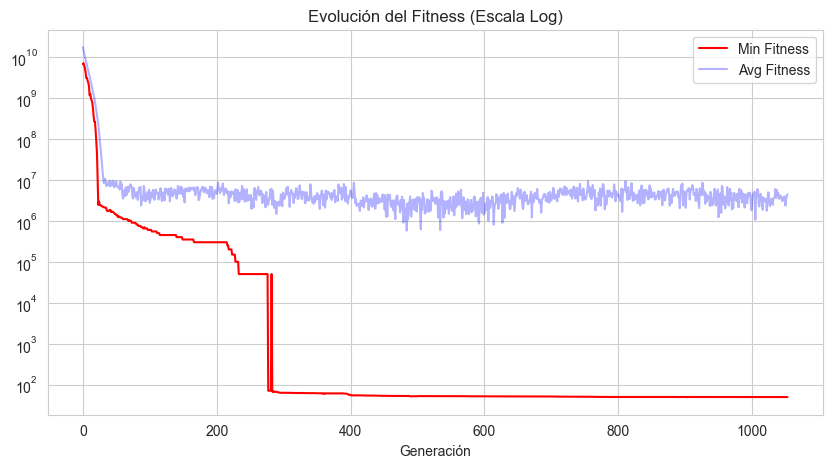

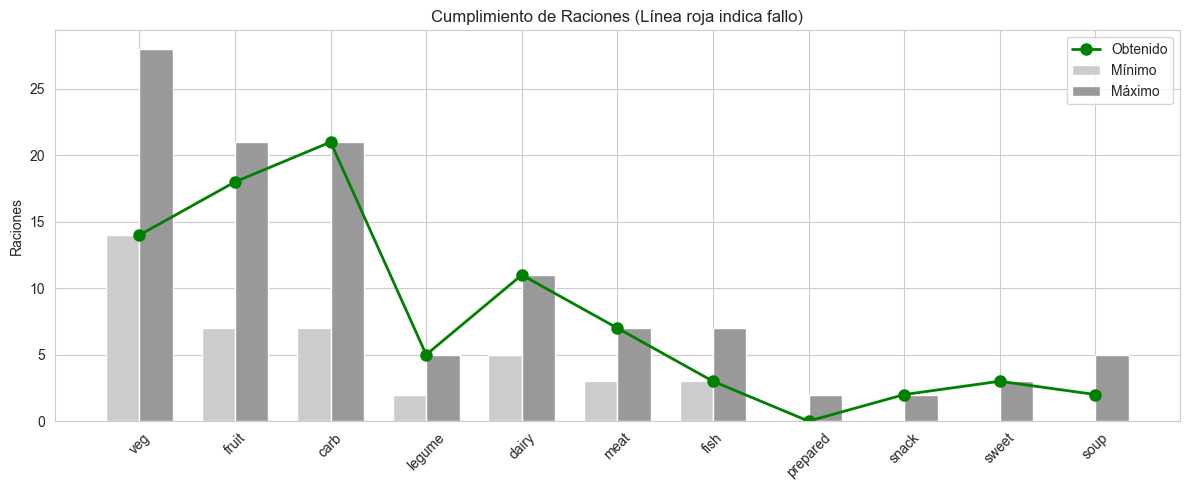

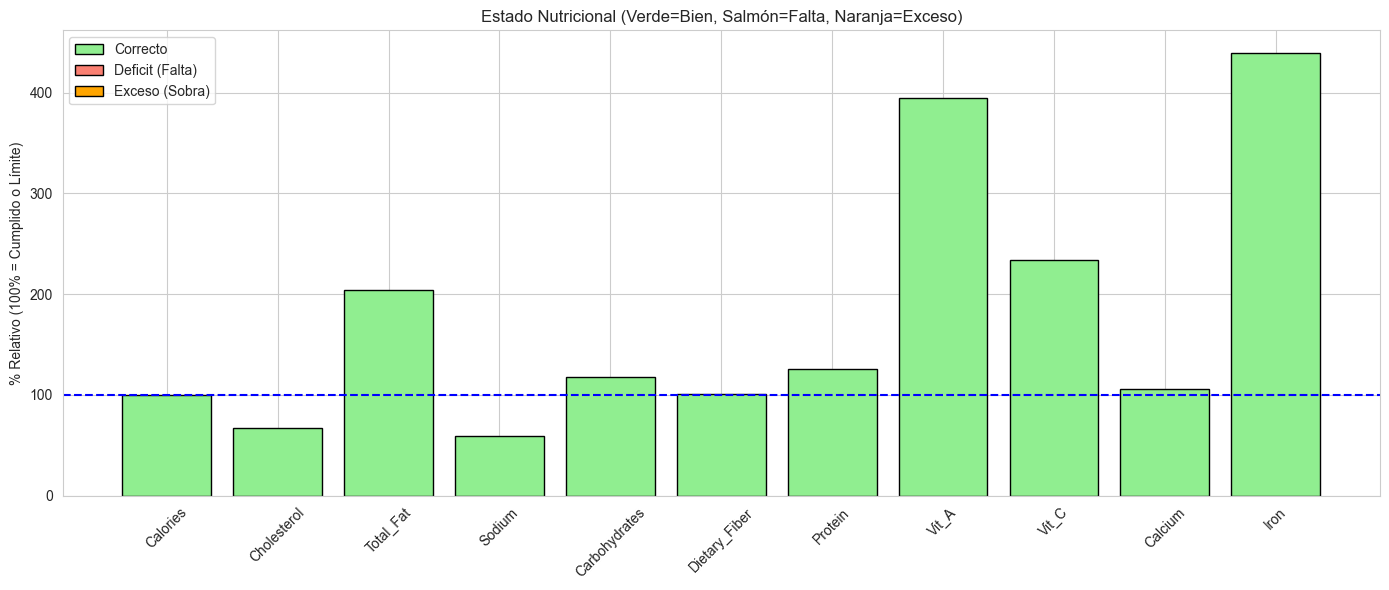

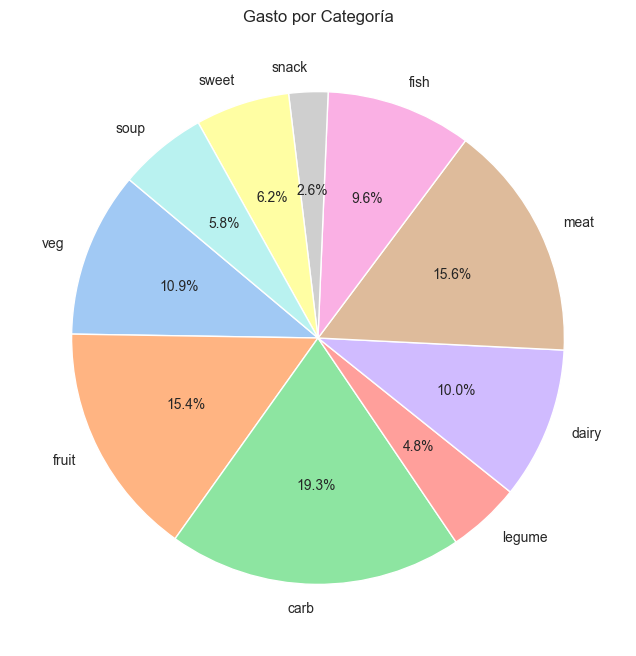

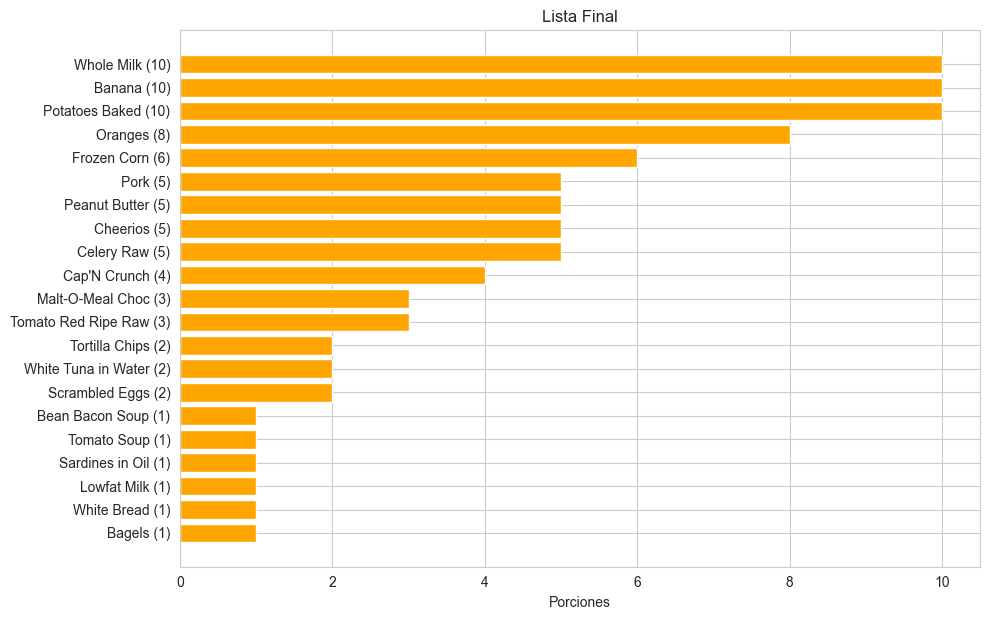

In [5]:
import random
import numpy
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from deap import base
from deap import creator
from deap import tools

# ==========================
# Parámetros del problema
# ==========================

CSV_FILE = "diet_with_prices.csv"
MAX_PORTION = 10            # He subido un poco esto para dar margen si necesita más de algo barato
LAMBDA = 50000              # <--- CAMBIO CLAVE: Penalización masiva. Si se pasa, el fitness se dispara.

# Límites de nutrientes
NUTRIENT_BOUNDS = {
    "Calories":        (14000.0, 17500.0),
    "Cholesterol":     (0.0,    2100.0),
    "Total_Fat":       (300.0,  650.0),
    "Sodium":          (0.0,    16000.0),
    "Carbohydrates":   (1500.0, 2600.0),
    "Dietary_Fiber":   (140.0,  280.0),
    "Protein":         (350.0,  700.0),
    "Vit_A":           (5000.0, 20000.0),
    "Vit_C":           (500.0,  7000.0),
    "Calcium":         (4900.0, 10500.0),
    "Iron":            (60.0,   280.0),
}

# Categorías de alimentos (Mismo mapa)
CATEGORY_MAP = {
    "Frozen Broccoli":        "veg",
    "Carrots Raw":            "veg",
    "Celery Raw":             "veg",
    "Frozen Corn":            "veg",
    "Lettuce Iceberg Raw":    "veg",
    "Peppers Sweet Raw":      "veg",
    "Tomato Red Ripe Raw":    "veg",
    "Potatoes Baked":         "carb",
    "Bagels":                 "carb",
    "Wheat Bread":            "carb",
    "White Bread":            "carb",
    "Cap'N Crunch":           "carb",
    "Cheerios":               "carb",
    "Corn Flakes Kellogg'S":  "carb",
    "Raisin Bran Kellogg'S":  "carb",
    "Rice Krispies":          "carb",
    "Special K":              "carb",
    "Oatmeal":                "carb",
    "Couscous":               "carb",
    "Macaroni cooked":        "carb",
    "Apple Raw w/Skin":       "fruit",
    "Banana":                 "fruit",
    "Grapes":                 "fruit",
    "Kiwifruit Raw Fresh":    "fruit",
    "Oranges":                "fruit",
    "Tofu":                   "legume",
    "Peanut Butter":          "legume",
    "Butter Regular":         "dairy",
    "Cheddar Cheese":         "dairy",
    "Whole Milk":             "dairy",
    "Lowfat Milk":            "dairy",
    "Skim Milk":              "dairy",
    "Roasted Chicken":        "meat",
    "Poached Eggs":           "meat",
    "Scrambled Eggs":         "meat",
    "Bologna Turkey":         "meat",
    "Frankfurter Beef":       "meat",
    "Ham Sliced Extralean":   "meat",
    "Kielbasa Pork":          "meat",
    "Pork":                   "meat",
    "Sardines in Oil":        "fish",
    "White Tuna in Water":    "fish",
    "Pizza w/Pepperoni":      "prepared",
    "Hamburger w/Toppings":   "prepared",
    "Hotdog Plain":           "prepared",
    "Spaghetti W/ Sauce":     "prepared",
    "Oatmeal Cookies":        "sweet",
    "Apple Pie":              "sweet",
    "Chocolate Chip Cookies": "sweet",
    "Malt-O-Meal Choc":       "sweet",
    "Popcorn Air-Popped":     "snack",
    "Potato Chips":           "snack",
    "Pretzels":               "snack",
    "Tortilla Chips":         "snack",
    "Chicken Noodle Soup":    "soup",
    "Splt Pea&Ham Soup":      "soup",
    "Veggie Beef Soup":       "soup",
    "New Eng Clam Chwd":      "soup",
    "Tomato Soup":            "soup",
    "Crm Mshrm Soup":         "soup",
    "Bean Bacon Soup":        "soup",
}

# Límites por categoría
CATEGORY_BOUNDS = {
    "veg":      (14, 28),
    "fruit":    (7, 21),
    "carb":     (7, 21),
    "legume":   (2, 5),   # <--- Ahora LAMBDA protegerá este límite a muerte
    "dairy":    (5, 11),
    "meat":     (3, 7),
    "fish":     (3, 7),
    "prepared": (0, 2),
    "snack":    (0, 2),
    "sweet":    (0, 3),
    "soup":     (0, 5),
}

# Parámetros del Algoritmo Genético
POPULATION_SIZE = 1000
P_CROSSOVER = 0.8
P_MUTATION = 0.3        # <--- Aumentado para explorar más y evitar estancamiento rápido
MAX_GENERATIONS = 3000  # <--- Aumentado el techo máximo
HALL_OF_FAME_SIZE = 10

# Criterio de parada
MAX_STAGNATION = 150    # <--- Aumentado: debe esperar 150 gen sin cambios antes de pensar en parar

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

FOODS = None
NUTRIENT_NAMES = list(NUTRIENT_BOUNDS.keys())


# ==========================
# Utilidades
# ==========================

def load_foods(csv_file, nutrient_bounds):
    foods = []
    try:
        with open(csv_file, newline="", encoding="utf-8") as f:
            reader = csv.DictReader(f)
            for row in reader:
                name = row["Name"]
                if name not in CATEGORY_MAP:
                    CATEGORY_MAP[name] = "prepared"
                
                food = {
                    "Name": name,
                    "Price": float(row["Price"]),
                    "Category": CATEGORY_MAP[name],
                }
                for nut in nutrient_bounds.keys():
                    food[nut] = float(row[nut])
                foods.append(food)
    except FileNotFoundError:
        print(f"ERROR: No se encontró el archivo '{csv_file}'.")
        exit()
    return foods


# ==========================
# Fitness
# ==========================

def diet_fitness(individual):
    foods = FOODS
    cost = 0.0
    totals = {nut: 0.0 for nut in NUTRIENT_NAMES}
    cat_totals = {cat: 0.0 for cat in CATEGORY_BOUNDS.keys()}

    for qty, food in zip(individual, foods):
        cost += qty * food["Price"]
        for nut in NUTRIENT_NAMES:
            totals[nut] += qty * food[nut]
        cat_totals[food["Category"]] += qty

    penalty = 0.0

    # Penalización por nutrientes
    for nut, (mn, mx) in NUTRIENT_BOUNDS.items():
        v = totals[nut]
        if v < mn:
            penalty += (mn - v)
        elif v > mx:
            penalty += (v - mx)

    # Penalización por categorías
    for cat, (mn, mx) in CATEGORY_BOUNDS.items():
        v = cat_totals[cat]
        if v < mn:
            penalty += (mn - v)
        elif v > mx:
            penalty += (v - mx)

    # Si hay penalización, LAMBDA multiplica el error. 
    # Al ser LAMBDA 50000, cualquier error hace el fitness gigante.
    return (cost + LAMBDA * penalty,)


# ==========================
# Operadores
# ==========================

def mutAddInteger(individual, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            delta = random.choice([-1, 1])
            individual[i] = max(0, min(MAX_PORTION, individual[i] + delta))
    return individual,


# ==========================
# Main
# ==========================

def main():
    global FOODS
    FOODS = load_foods(CSV_FILE, NUTRIENT_BOUNDS)
    n_foods = len(FOODS)
    print(f"{n_foods} alimentos cargados.")

    toolbox.register("attrInt", random.randint, 0, MAX_PORTION)
    toolbox.register("individualCreator", tools.initRepeat, creator.Individual,
                     toolbox.attrInt, n_foods)
    toolbox.register("populationCreator", tools.initRepeat, list,
                     toolbox.individualCreator)

    toolbox.register("evaluate", diet_fitness)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", mutAddInteger, indpb=1.0 / n_foods)

    population = toolbox.populationCreator(n=POPULATION_SIZE)
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
    
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", numpy.min)
    stats.register("avg", numpy.mean)

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + stats.fields
    
    # Evaluar inicial
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    hof.update(population)
    record = stats.compile(population)
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    print(logbook.stream)

    best_fitness_ever = float("inf")
    stagnation_counter = 0
    
    # Umbral para considerar que una dieta es "Válida" (Sin penalizaciones graves)
    # Como LAMBDA es 50000, cualquier dieta válida debería costar menos de 5000 (precio real).
    # Si el fitness > 5000, significa que se está violando alguna restricción.
    VALID_FITNESS_THRESHOLD = 5000.0

    print("\nIniciando evolución... (LAMBDA alto para forzar cumplimiento estricto)")

    for gen in range(1, MAX_GENERATIONS + 1):
        # Selección, Cruce y Mutación
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < P_CROSSOVER:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < P_MUTATION:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluación
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        population[:] = offspring
        hof.update(population)
        
        record = stats.compile(population)
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        
        if gen % 10 == 0:
            print(logbook.stream)
            
        # --- LÓGICA DE PARADA MEJORADA ---
        current_best = hof[0].fitness.values[0]
        
        if current_best < best_fitness_ever - 1e-4:
            best_fitness_ever = current_best
            stagnation_counter = 0 
        else:
            stagnation_counter += 1
            
        # Condición de salida:
        # 1. Llevamos muchas generaciones sin mejorar (MAX_STAGNATION)
        # 2. Y ADEMÁS, la solución actual es válida (fitness < THRESHOLD).
        # Si la solución no es válida (rompe reglas), NO paramos aunque estemos estancados.
        if stagnation_counter >= MAX_STAGNATION:
            if current_best < VALID_FITNESS_THRESHOLD:
                print(f"\n>>> PARADA: Convergencia en gen {gen}. Solución válida y estable.")
                break
            else:
                # Si estamos estancados en una solución inválida, reiniciamos el contador
                # para forzarle a seguir buscando una salida (mutaciones ayudarán).
                if gen % 50 == 0:
                    print("   [Aviso] Estancado en solución inválida... Forzando búsqueda.")
                stagnation_counter = 0 
            
    # =====================================
    # RESULTADOS
    # =====================================

    minFitnessValues = logbook.select("min")
    meanFitnessValues = logbook.select("avg")
    best = hof[0]

    cost = 0.0
    totals = {nut: 0.0 for nut in NUTRIENT_NAMES}
    cat_totals = {cat: 0.0 for cat in CATEGORY_BOUNDS.keys()}
    cat_costs = {cat: 0.0 for cat in CATEGORY_BOUNDS.keys()}

    for qty, food in zip(best, FOODS):
        price_item = qty * food["Price"]
        cost += price_item
        cat_costs[food["Category"]] += price_item
        for nut in NUTRIENT_NAMES:
            totals[nut] += qty * food[nut]
        cat_totals[food["Category"]] += qty

    print(f"\nFitness Final: {best.fitness.values[0]:.2f}")
    if best.fitness.values[0] > VALID_FITNESS_THRESHOLD:
        print("ADVERTENCIA: La solución final aun incumple alguna restricción levemente.")
    else:
        print("ÉXITO: Todas las restricciones se cumplen.")
        
    print(f"Coste real en dinero: {cost:.2f}")

    # =====================================
    # GRÁFICOS
    # =====================================

    # 1. Evolución
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 5))
    plt.plot(minFitnessValues, color='red', label='Min Fitness')
    plt.plot(meanFitnessValues, color='blue', label='Avg Fitness', alpha=0.3)
    plt.yscale('log') # Escala logarítmica porque al inicio el fitness será gigante
    plt.title("Evolución del Fitness (Escala Log)")
    plt.xlabel("Generación")
    plt.legend()
    plt.show()

    # 2. Raciones por Categoría (EL QUE DABA PROBLEMAS)
    categories = list(cat_totals.keys())
    values = [cat_totals[c] for c in categories]
    mins = [CATEGORY_BOUNDS[c][0] for c in categories]
    maxs = [CATEGORY_BOUNDS[c][1] for c in categories]

    x = numpy.arange(len(categories))
    width = 0.35

    plt.figure(figsize=(12, 5))
    plt.bar(x - width/2, mins, width, label='Mínimo', color='#cccccc')
    plt.bar(x + width/2, maxs, width, label='Máximo', color='#999999')
    
    # Colorear la línea según si cumple o no
    line_color = 'green'
    for v, mn, mx in zip(values, mins, maxs):
        if v < mn or v > mx:
            line_color = 'red' # Si algo falla, se verá rojo
            break

    plt.plot(x, values, 'o-', color=line_color, label='Obtenido', markersize=8, linewidth=2)

    plt.xticks(x, categories, rotation=45)
    plt.ylabel('Raciones')
    plt.title('Cumplimiento de Raciones (Línea roja indica fallo)')
    plt.legend()
    plt.tight_layout()
    plt.show()

   # =====================================
    # Gráfico 3 (CORREGIDO): Nutrientes Relativos
    # =====================================
    nutrients = list(totals.keys())
    percentages = []
    colors = []
    
    for n in nutrients:
        val = totals[n]
        mn = NUTRIENT_BOUNDS[n][0]
        mx = NUTRIENT_BOUNDS[n][1]
        
        # CASO A: Nutrientes que hay que alcanzar (tienen mínimo > 0)
        # Ejemplo: Proteínas, Calorías, Vitaminas
        if mn > 0:
            pct = (val / mn) * 100
            percentages.append(pct)
            
            if pct < 100:
                colors.append('salmon')    # Falta (Malo)
            elif val > mx:
                colors.append('orange')    # Exceso (Regular)
            else:
                colors.append('lightgreen') # OK (Bueno)

        # CASO B: Nutrientes a limitar (mínimo es 0)
        # Ejemplo: Sodio, Colesterol
        else:
            # Aquí calculamos el % respecto al LÍMITE MÁXIMO
            pct = (val / mx) * 100
            percentages.append(pct)
            
            if pct > 100:
                colors.append('orange')    # Te pasaste del límite (Malo)
            else:
                colors.append('lightgreen') # Estás por debajo del límite (Bueno)

    x = numpy.arange(len(nutrients))
    
    plt.figure(figsize=(14, 6))
    bars = plt.bar(x, percentages, color=colors, edgecolor='black')
    
    # Línea de referencia del 100%
    plt.axhline(y=100, color='blue', linestyle='--', label='Objetivo / Límite')
    
    plt.xticks(x, nutrients, rotation=45)
    plt.ylabel("% Relativo (100% = Cumplido o Límite)")
    plt.title("Estado Nutricional (Verde=Bien, Salmón=Falta, Naranja=Exceso)")
    
    # Leyenda personalizada para explicar los colores
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='lightgreen', edgecolor='black', label='Correcto'),
        Patch(facecolor='salmon', edgecolor='black', label='Deficit (Falta)'),
        Patch(facecolor='orange', edgecolor='black', label='Exceso (Sobra)')
    ]
    plt.legend(handles=legend_elements)
    
    plt.tight_layout()
    plt.show()

    # 4. Distribución del dinero
    labels_cost = []
    values_cost = []
    for cat, val in cat_costs.items():
        if val > 0:
            labels_cost.append(cat)
            values_cost.append(val)
            
    plt.figure(figsize=(8, 8))
    plt.pie(values_cost, labels=labels_cost, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Gasto por Categoría")
    plt.show()

    # 5. Lista de Compra
    selected_foods = []
    selected_qty = []
    data_tuples = sorted(zip(best, FOODS), key=lambda x: x[0], reverse=False)
    
    for qty, food in data_tuples:
        if qty > 0:
            selected_foods.append(f"{food['Name']} ({qty})")
            selected_qty.append(qty)

    plt.figure(figsize=(10, max(6, len(selected_foods)*0.3)))
    plt.barh(selected_foods, selected_qty, color='orange')
    plt.xlabel("Porciones")
    plt.title("Lista Final")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()